In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv("C:/Users/afreen quraishi/Downloads/boston_housing data/train.csv")
test_df = pd.read_csv("C:/Users/afreen quraishi/Downloads/boston_housing data/test.csv") 

In [3]:
print(train_df.isnull().sum())
print("*************")
print(test_df.isnull().sum())

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
*************
ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64


In [4]:
train_df.drop('crim',axis=1,inplace=True)
train_df.drop('zn',axis=1,inplace=True)
train_df.drop('indus',axis=1,inplace=True)
train_df.drop('chas',axis=1,inplace=True)
train_df.drop('nox',axis=1,inplace=True)
train_df.drop('dis',axis=1,inplace=True)
train_df.drop('rad',axis=1,inplace=True)
train_df.drop('tax',axis=1,inplace=True)
train_df.drop('black',axis=1,inplace=True)

In [5]:
train_df.shape

(333, 6)

In [6]:
train_df.head()

,ID,rm,age,ptratio,lstat,medv
0,1,6.575,65.2,15.3,4.98,24.0
1,2,6.421,78.9,17.8,9.14,21.6
2,4,6.998,45.8,18.7,2.94,33.4
3,5,7.147,54.2,18.7,5.33,36.2
4,7,6.012,66.6,15.2,12.43,22.9


In [7]:
y = train_df["medv"]

In [8]:
train_df.drop('medv',axis =1,inplace= True)

In [9]:
train_df.head()

,ID,rm,age,ptratio,lstat
0,1,6.575,65.2,15.3,4.98
1,2,6.421,78.9,17.8,9.14
2,4,6.998,45.8,18.7,2.94
3,5,7.147,54.2,18.7,5.33
4,7,6.012,66.6,15.2,12.43


In [10]:
train_df.shape

(333, 5)

In [11]:
test_df.drop('crim',axis=1,inplace=True)
test_df.drop('zn',axis=1,inplace=True)
test_df.drop('indus',axis=1,inplace=True)
test_df.drop('chas',axis=1,inplace=True)
test_df.drop('nox',axis=1,inplace=True)
test_df.drop('dis',axis=1,inplace=True)
test_df.drop('rad',axis=1,inplace=True)
test_df.drop('tax',axis=1,inplace=True)
test_df.drop('black',axis=1,inplace=True)

In [12]:
test_df.shape

(173, 5)

In [13]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(train_df)
X_scaled.shape

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(333, 5)

In [14]:
pca =PCA()
pca_transform = pca.fit_transform(X_scaled)

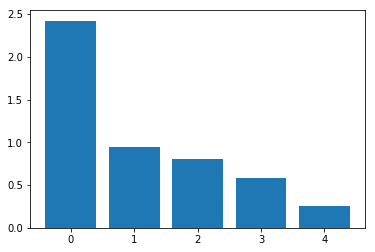

In [15]:
plt.bar(range(pca.n_components_),pca.explained_variance_)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df,y,test_size=0.3,random_state=21)

In [17]:
pipeline = make_pipeline(StandardScaler(),PCA(n_components=4),Ridge())
parameters = {'ridge__alpha': np.array(range(0,101))/1000}
model = GridSearchCV(pipeline,parameters,cv=5)

In [18]:
model.fit(train_df,y)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-package

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ridge__alpha': array([0.   , 0.001, ..., 0.099, 0.1  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
model.score(train_df,y)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6478866295062897

In [20]:
model.best_params_

{'ridge__alpha': 0.1}

In [21]:
model.best_score_

0.033302316642112605

In [22]:
y_pred = model.predict(test_df)

C:\Users\afreen quraishi\Anaconda3\envs\test\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [23]:
y_pred.shape

(173,)

In [24]:
predict_price = pd.DataFrame({
    "Id" : test_df["ID"],
    "medv" : y_pred
})

In [25]:
predict_price.to_csv("predict_price.csv", index = False)